In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
startups = pd.read_csv('50_Startups.csv')

In [3]:
startups.sample(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
33,55493.95,103057.49,214634.81,Florida,96778.92
18,91749.16,114175.79,294919.57,Florida,124266.90
39,38558.51,82982.09,174999.30,California,81005.76
9,123334.88,108679.17,304981.62,California,149759.96
27,72107.60,127864.55,353183.81,New York,105008.31
32,63408.86,129219.61,46085.25,California,97427.84
3,144372.41,118671.85,383199.62,New York,182901.99
26,75328.87,144135.98,134050.07,Florida,105733.54
20,76253.86,113867.30,298664.47,California,118474.03
46,1315.46,115816.21,297114.46,Florida,49490.75


## EDA

In [4]:
startups.shape

(50, 5)

In [5]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
print(startups.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [9]:
print(startups.duplicated().sum())

0


In [10]:
#saving the data in 'data' using copy function
data = startups.copy()

In [11]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
#renaming the columns
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
#renaming the columns
data.rename({'R&D Spend':'RND','Administration':'ADMIN','Marketing Spend':'MKT'}, axis=1, inplace=True)

In [14]:
data.head()

,RND,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Corelation 

In [15]:
data.corr(numeric_only=True)

,RND,ADMIN,MKT,Profit
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


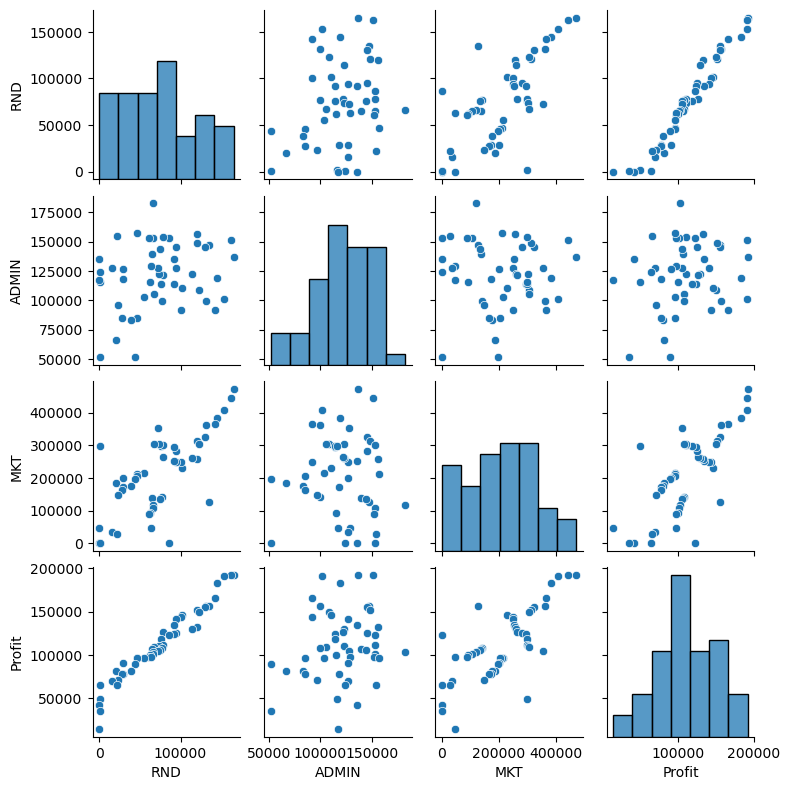

In [16]:
sns.pairplot(data, height=2);

## Model Building with all the independant variables


In [17]:
model= smf.ols('Profit~RND+ADMIN+MKT', data= data).fit()

In [18]:
#Parameters- checking the coefficients
model.params

Intercept    50122.192990
RND              0.805715
ADMIN           -0.026816
MKT              0.027228
dtype: float64

In [19]:
#t-values and p-values of the model
#tvalues and pvalues of the models
print('The tvalues of the model are:\n{} \n\nThe pvalues of the model are are: \n{}'.format(model.tvalues, round(model.pvalues,5)))

The tvalues of the model are:
Intercept     7.626218
RND          17.846374
ADMIN        -0.525507
MKT           1.655077
dtype: float64 

The pvalues of the model are are: 
Intercept    0.00000
RND          0.00000
ADMIN        0.60176
MKT          0.10472
dtype: float64


In [20]:
#Rsquared and Adjusted Rsquared values for the model 

print('The Rsquared value of the model is:\n{} \n\nThe Adjusted Rsquared value of the model is \n{}'.format(model.rsquared, model.rsquared_adj))
# Current model accuracy is 94.75%

The Rsquared value of the model is:
0.9507459940683246 

The Adjusted Rsquared value of the model is 
0.9475337762901719


In [21]:
'''
From the pvalues of the model we can notice that ADMIN and MKT pvalues are >0.05 
and are insignificant.
Here to make sure we need to find the SLR(Simple Linear Regression) and MLR(Multi Linear Regression) of these 
insignificant values
'''

'\nFrom the pvalues of the model we can notice that ADMIN and MKT pvalues are >0.05 \nand are insignificant.\nHere to make sure we need to find the SLR(Simple Linear Regression) and MLR(Multi Linear Regression) of these \ninsignificant values\n'

In [22]:
# SLR of ADMIN
slr_a = smf.ols('Profit~ADMIN', data = data).fit()

In [23]:
slr_a.tvalues, slr_a.pvalues  #Insignificant pvalue  for ADMIN

(Intercept    3.040044
 ADMIN        1.419493
 dtype: float64,
 Intercept    0.003824
 ADMIN        0.162217
 dtype: float64)

In [24]:
# SLR for MKT
slr_m = smf.ols('Profit~MKT', data = data).fit()

In [25]:
slr_m.tvalues , slr_m.pvalues #Significant pvalue for MKT

(Intercept    7.808356
 MKT          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKT          4.381073e-10
 dtype: float64)

In [26]:
# MLR for MKT and ADMIN
mlr_am = smf.ols('Profit~MKT+ADMIN', data = data).fit()

In [27]:
mlr_am.tvalues, mlr_am.pvalues  #significant pvalues when MLR is considered

(Intercept    1.142741
 MKT          8.281039
 ADMIN        2.467779
 dtype: float64,
 Intercept    2.589341e-01
 MKT          9.727245e-11
 ADMIN        1.729198e-02
 dtype: float64)

## Model Validation 

## 2 Tests: Collinearity and Residual Analysis

In [28]:
# 1. Collinearity Test aka Variable Inflation Factor (VIF) MKT ADMIN RND

rsq_m = smf.ols('MKT~ADMIN+RND', data = data).fit().rsquared
vif_m = 1/(1-rsq_m)

rsq_a = smf.ols('ADMIN~MKT+RND', data = data).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_r = smf.ols('RND~ADMIN+MKT', data = data).fit().rsquared
vif_r = 1/(1-rsq_r)

d = {'Variables':['MKT', 'ADMIN', 'RND'],'VIF':[vif_m, vif_a, vif_r] }
df = pd.DataFrame(d)
df

,Variables,VIF
0,MKT,2.326773
1,ADMIN,1.175091
2,RND,2.468903


In [29]:
# None variables  have VIF > 20, thus consider all variables in MLR

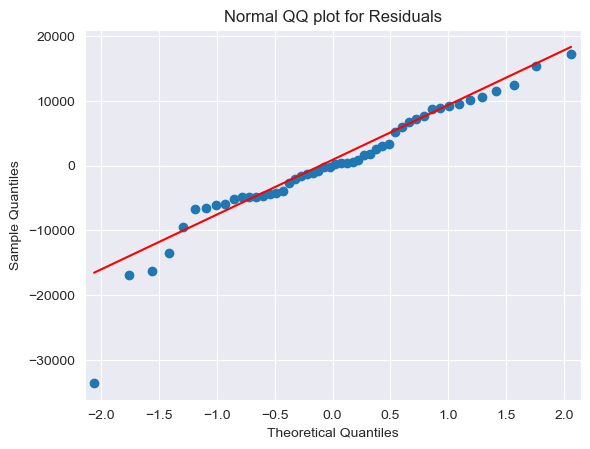

In [30]:
# Residuals Test
# Test of normality of residuals
sns.set_style(style= 'darkgrid')
sm.qqplot(model.resid, line='q')
plt.title('Normal QQ plot for Residuals');

In [31]:
list(np.where(model.resid< -30000))

[array([49])]

In [32]:
# Test for homoscedasticity or heteroscedasticity
def standard_vals(vals): return (vals - vals.mean())/vals.std()

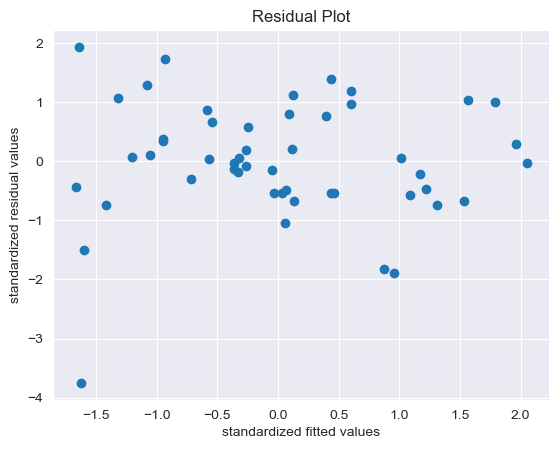

In [33]:
plt.scatter(standard_vals(model.fittedvalues), standard_vals(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [34]:
#Test for Residuals vs Regressors --- Errors vs Independant Variables
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    
# exog = x-variable & endog = y-variable

eval_env: 1


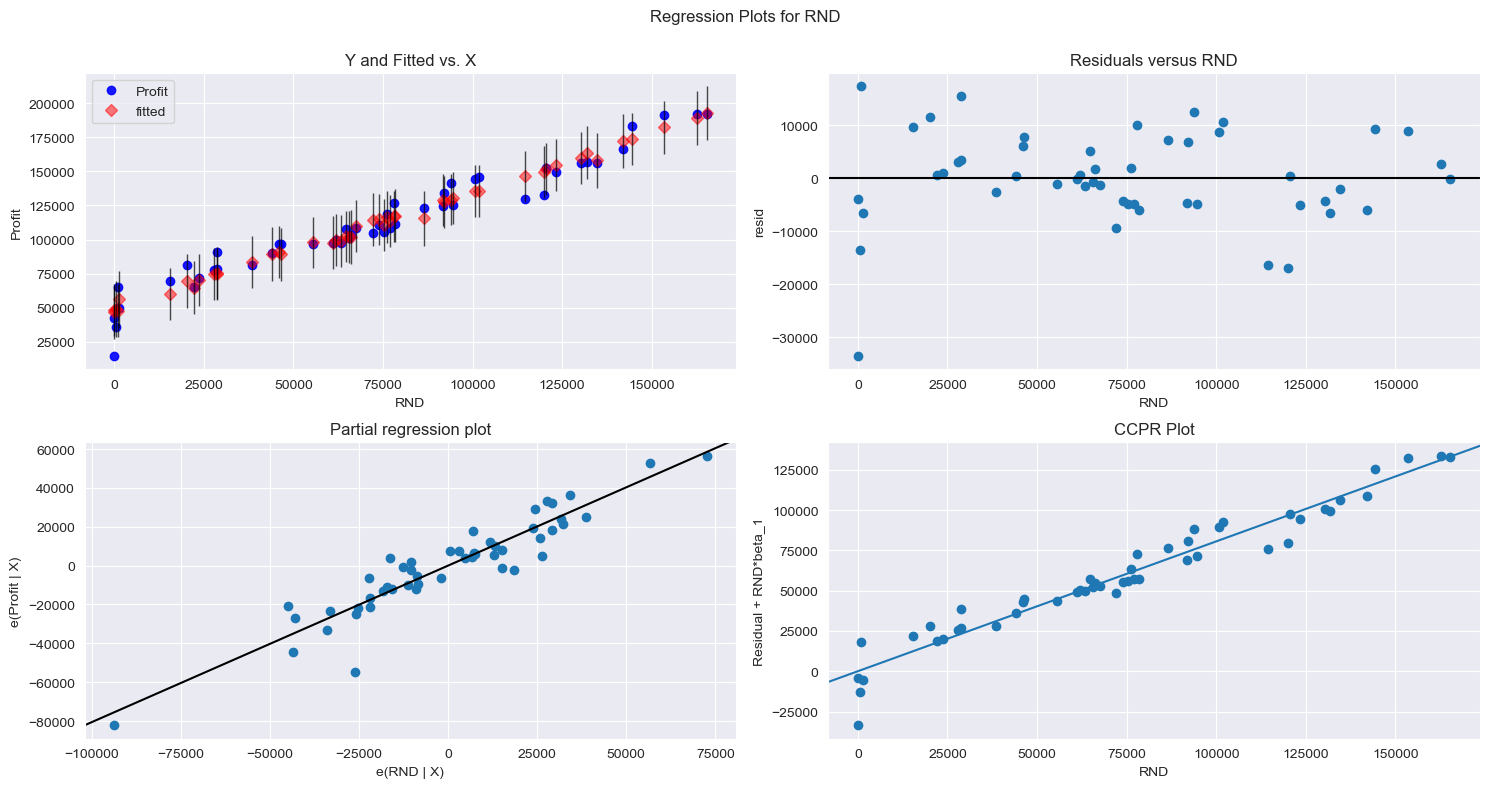

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RND',fig=fig)
plt.show()

eval_env: 1


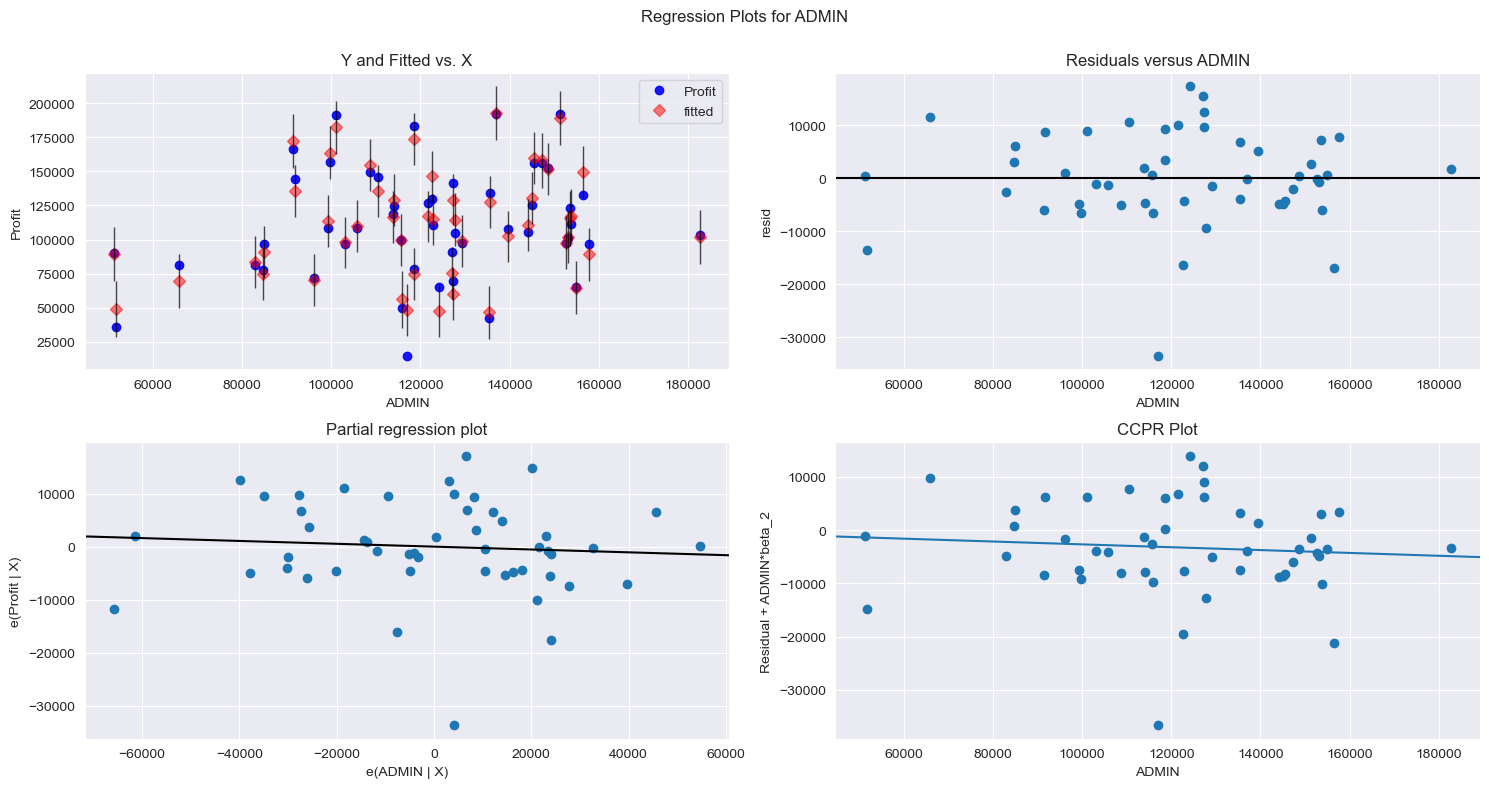

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'ADMIN', fig=fig)
plt.show()

eval_env: 1


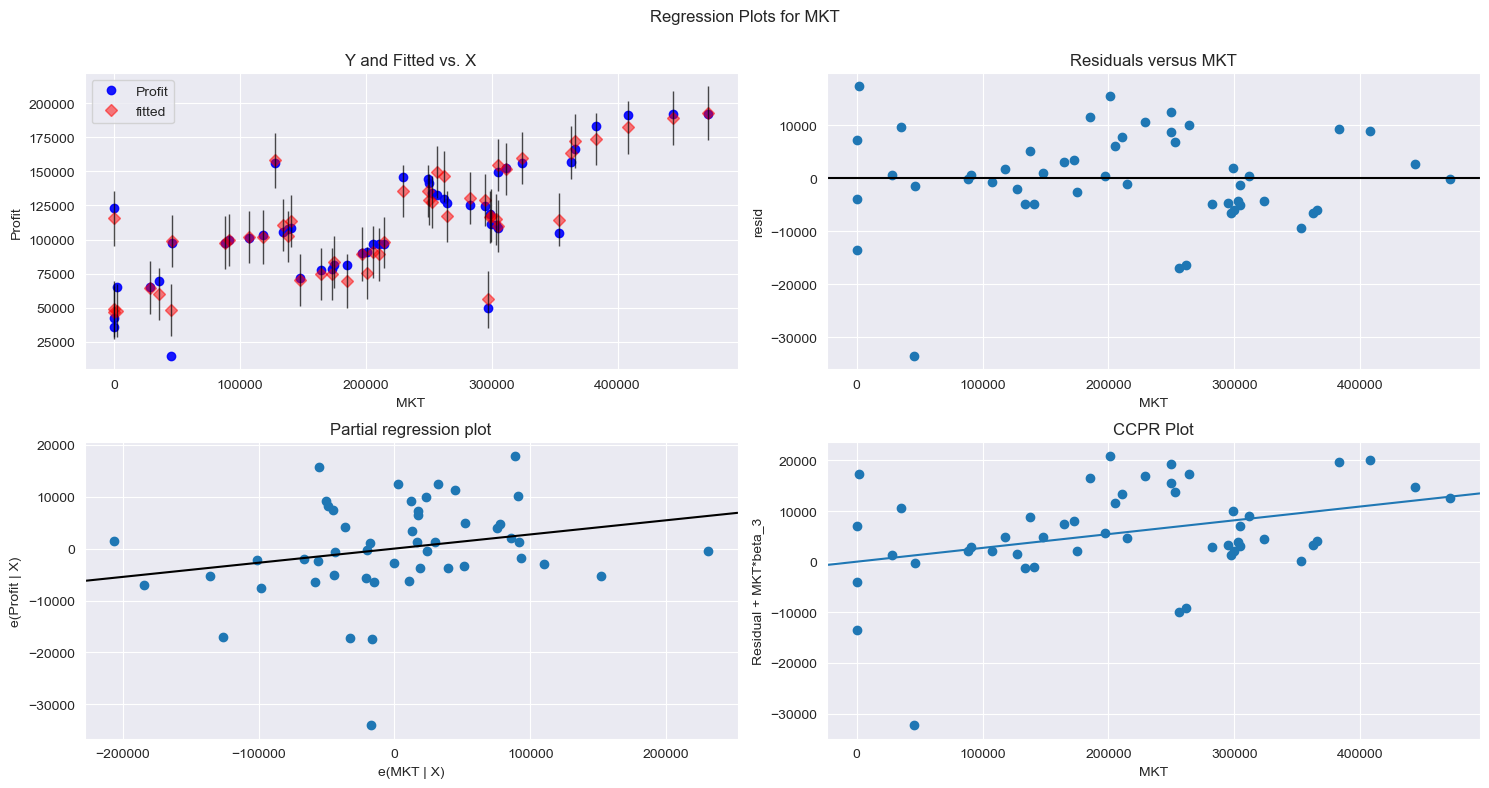

In [37]:
fig= plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKT', fig=fig)
plt.show()

## Model Deletion using: Cooks distance and Leverage Cutoffs

In [38]:
# Calculate the Cooks Distance

(c,_) = model.get_influence().cooks_distance

In [39]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

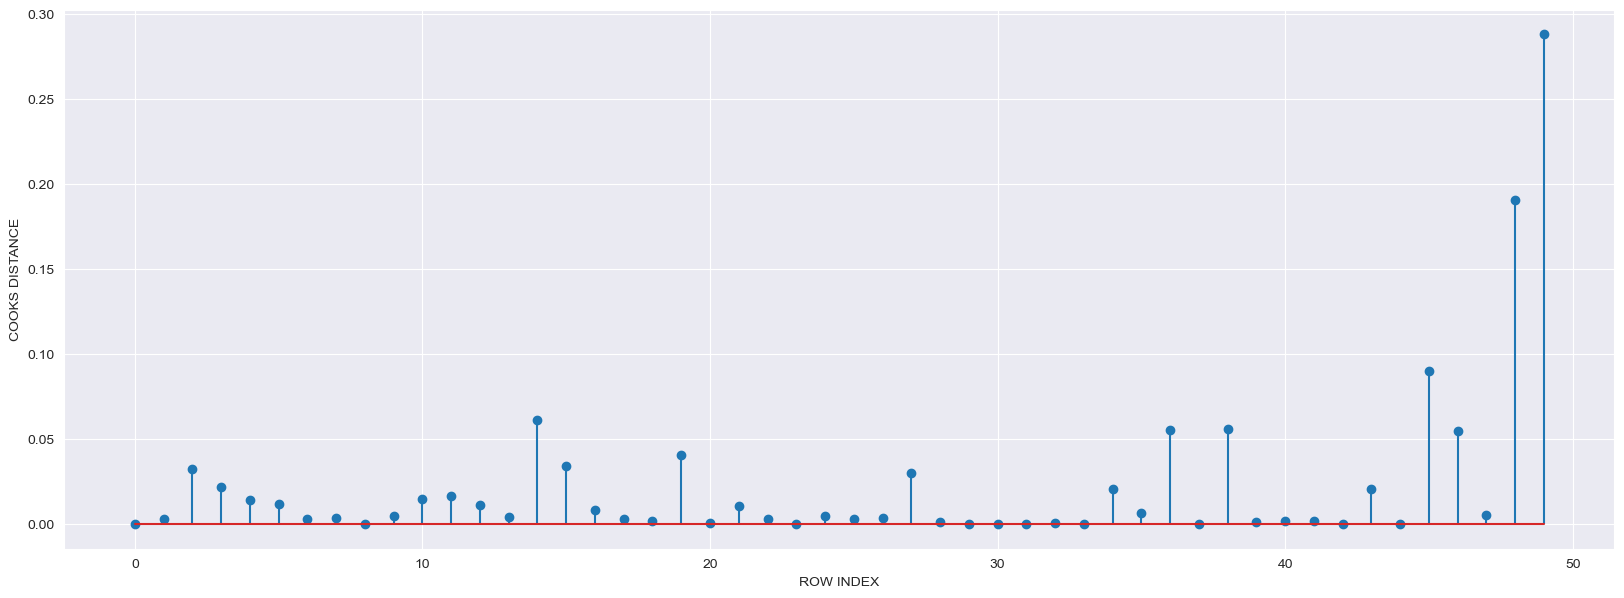

In [40]:
#Plot for the cooks distance 
fig= plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('ROW INDEX')
plt.ylabel('COOKS DISTANCE')
plt.show()

In [41]:
# getting the max value of c
np.argmax(c) , np.round((np.max(c)),5)

(49, 0.28808)

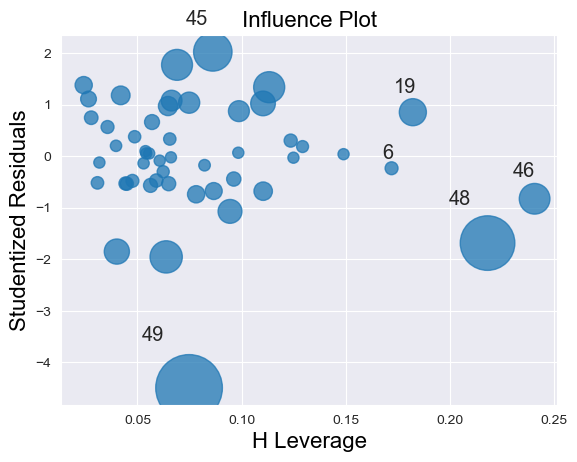

In [42]:
#Plotting the influence plot for leverage
sm.graphics.influence_plot(model)
plt.show()

In [43]:
#Leverage cut off value = 3* (k+1)/n..... where k = number of features/columns and n is number datapoints or rows

k = data.shape[1]
n = data.shape[0]
leverage_cutoff =  (3*(k+1))/n
leverage_cutoff

0.36

In [44]:
data[data.index.isin([49])]

,RND,ADMIN,MKT,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the model

In [45]:
# Deleting the 49th row

data1 = data.drop(data.index[[49]], axis=0).reset_index(drop=True)
data1

,RND,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
np.max(c)

0.2880822927543272

In [47]:
while np.max(c)>0.5:
    model =smf.ols('Profit~RND+ADMIN+MKT', data = data1).fit()
    (c,_)= model.get_influence().cooks_distance
    data1 = data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data1
else:
    final_model=smf.ols("Profit~RND+ADMIN+MKT",data=data1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to {:%}".format(final_model.rsquared))

Thus model accuracy is improved to 96.131624%


In [48]:
final_model.rsquared

0.9613162435129848

## Models Predictions

In [49]:
data1

,RND,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [50]:
test_data = pd.DataFrame({'RND': 5000,'ADMIN':200000, 'MKT':100000}, index=[0])
test_data

,RND,ADMIN,MKT
0,5000,200000,100000


In [51]:
final_model.predict(test_data)

0    54380.537909
dtype: float64

In [52]:
predicted = final_model.predict(data1)
predicted

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [53]:
predicted_data = data1.copy()
predicted_data['Predicted'] = predicted

In [54]:
#Dataframe with actual Profit and a new column with Predicted Profit
predicted_data

,RND,ADMIN,MKT,State,Profit,Predicted
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778


## Models with the Rsquared values 

In [55]:
d1 = {'Models':['Initial Model', 'Final Model'], 'R-Squared':[model.rsquared, final_model.rsquared]}
rsquared_df = pd.DataFrame(d1)
rsquared_df

,Models,R-Squared
0,Initial Model,0.950746
1,Final Model,0.961316
